In [332]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

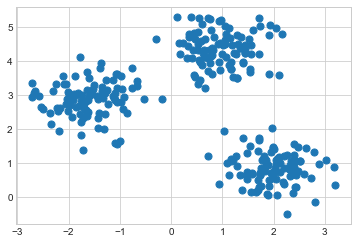

In [333]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=3,n_features=2,
                  random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], s=50);


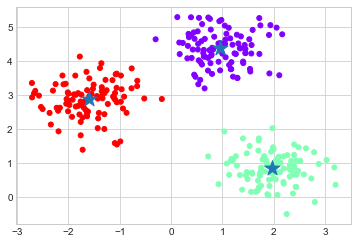

In [334]:
from sklearn.cluster import KMeans
km = KMeans(3)  # 3 clusters
km.fit(X)
y_kmeans = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*')

# How to determine the best K?

## Find the minimal SSE clustering using different K
### SSE is defined as the sum of the squared distance between each member of a cluster and its cluster centroid. Thus, SSE can be seen as a global measure of error. In general, as the number of clusters increases, the SSE should decrease because clusters are, by definition, smaller

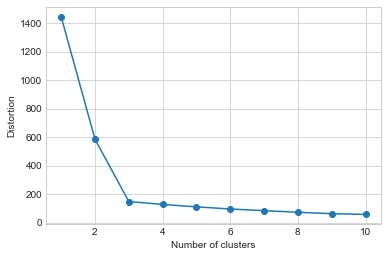

In [335]:
distortion = []
for i in range(10,0,-1):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortion.append(km.inertia_)
plt.plot(range(10,0,-1),distortion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## 2. Use silhouette analysis

In [336]:
from sklearn.cluster import KMeans
km = KMeans(3)  # 3 clusters
km.fit(X)
y_km = km.predict(X)

In [337]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
s_vals = silhouette_samples(X, y_km, metric='euclidean')

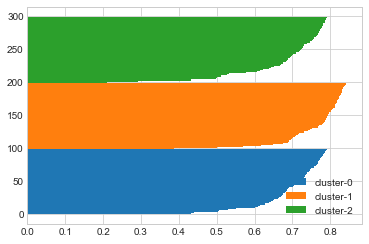

In [338]:
y_ax_lower, y_ax_upper = 0,0
yticks = []

for i,c in enumerate(cluster_labels):
    c_s_vals = s_vals[y_km==c]
    c_s_vals.sort()
    y_ax_upper += len(c_s_vals)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_s_vals,
            height = 1, label="cluster-"+str(c))
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_s_vals)
plt.legend()

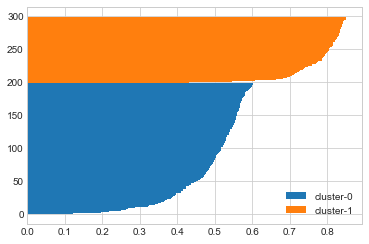

In [339]:
km = KMeans(2)  # 2 clusters
km.fit(X)
y_km = km.predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
s_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0,0
yticks = []

for i,c in enumerate(cluster_labels):
    c_s_vals = s_vals[y_km==c]
    c_s_vals.sort()
    y_ax_upper += len(c_s_vals)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_s_vals,
            height = 1, label="cluster-"+str(c))
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_s_vals)
plt.legend()

In [350]:
data_path='../data/'
instrument='IOTA'
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
data=data[["open","high","low","close"]]
data["date"]=data.index

In [351]:
data.head(10)

,open,high,low,close,date
date,,,,,
2017-06-13,0.638503,0.652862,0.533910,0.590255,2017-06-13
2017-06-14,0.592347,0.606196,0.495745,0.528916,2017-06-14
2017-06-15,0.528284,0.543165,0.300365,0.363661,2017-06-15
2017-06-16,0.353285,0.448249,0.309852,0.410757,2017-06-16
2017-06-17,0.426762,0.444205,0.414139,0.419906,2017-06-17
2017-06-18,0.420597,0.426069,0.393790,0.405862,2017-06-18
2017-06-19,0.405456,0.420990,0.388231,0.412183,2017-06-19
2017-06-20,0.414299,0.422032,0.398649,0.418494,2017-06-20
2017-06-21,0.419439,0.437340,0.405037,0.413547,2017-06-21


# K-Means Clustering of Daily OHLC Bar Data

In [352]:
def get_open_normalised_prices(df_orig, start, end):
    
    df=df_orig.copy(deep=True)
    df["H/O"] = df["high"]/df["open"]
    df["L/O"] = df["low"]/df["open"]
    df["C/O"] = df["close"]/df["open"]
    df.drop(
        [
            "open", "high", "low",
            "close","date"
        ],
        axis=1, inplace=True
    )
    return df

In [353]:
def plot_candlesticks(data, since):
    """
    Plot a candlestick chart of the prices,
    appropriately formatted for dates
    """
    # Copy and reset the index of the dataframe
    # to only use a subset of the data for plotting
    df = copy.deepcopy(data)
    df = df[df.index >= since]
    #df.reset_index(inplace=True)
    df['date_fmt'] = df['date'].apply(
        lambda date: mdates.date2num(date.to_pydatetime())
    )
    # Set the axis formatting correctly for dates
    # with Mondays highlighted as a "major" tick
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter('%b %d')
    fig, ax = plt.subplots(figsize=(16,4))
    fig.subplots_adjust(bottom=0.2)
    #ax.xaxis.set_major_locator(mondays)
    #ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)

    # Plot the candlestick OHLC chart using black for
    # up days and red for down days
    csticks = candlestick_ohlc(
        ax, df[
            ['date_fmt', 'open', 'high', 'low', 'close']
        ].values, width=0.6,
        colorup='#000000', colordown='#ff0000'
    )
    ax.set_axis_bgcolor((1,1,0.9))
    ax.xaxis_date()
    plt.setp(
        plt.gca().get_xticklabels(),
        rotation=45, horizontalalignment='right'
    )
    plt.show()

In [354]:
def plot_3d_normalised_candles(data):
    """
    Plot a 3D scatterchart of the open-normalised bars
    highlighting the separate clusters by colour
    """
    fig = plt.figure(figsize=(12, 9))
    ax = Axes3D(fig, elev=21, azim=-136)
    ax.scatter(
        data["H/O"], data["L/O"], data["C/O"],
        c=labels.astype(np.float)
    )
    ax.set_xlabel('high/open')
    ax.set_ylabel('low/open')
    ax.set_zlabel('close/open')
    plt.show()

In [355]:
import copy
import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import (
    DateFormatter, WeekdayLocator, DayLocator, MONDAY
)
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from sklearn.cluster import KMeans

C:\Users\junaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


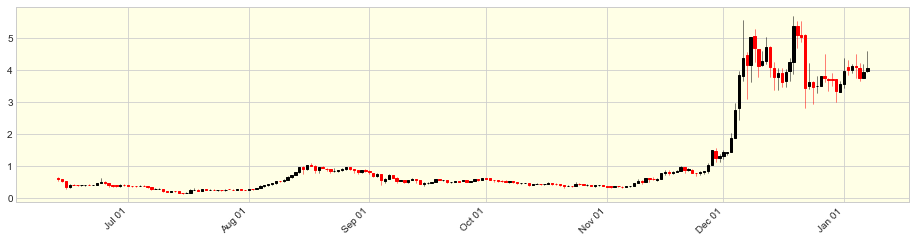

In [363]:
# Plot last year of price "candles"
plot_candlesticks(data, datetime.datetime(2017, 1, 1))



In [364]:
# Carry out K-Means clustering with five clusters on the
# three-dimensional data H/O, L/O and C/O
start = datetime.datetime(2013, 4, 28)
end = datetime.datetime(2018, 1, 1)
data_norm = get_open_normalised_prices(data, start, end)
k = 5
km = KMeans(n_clusters=k, random_state=42)
km.fit(data_norm)
labels = km.labels_
data["Cluster"] = labels



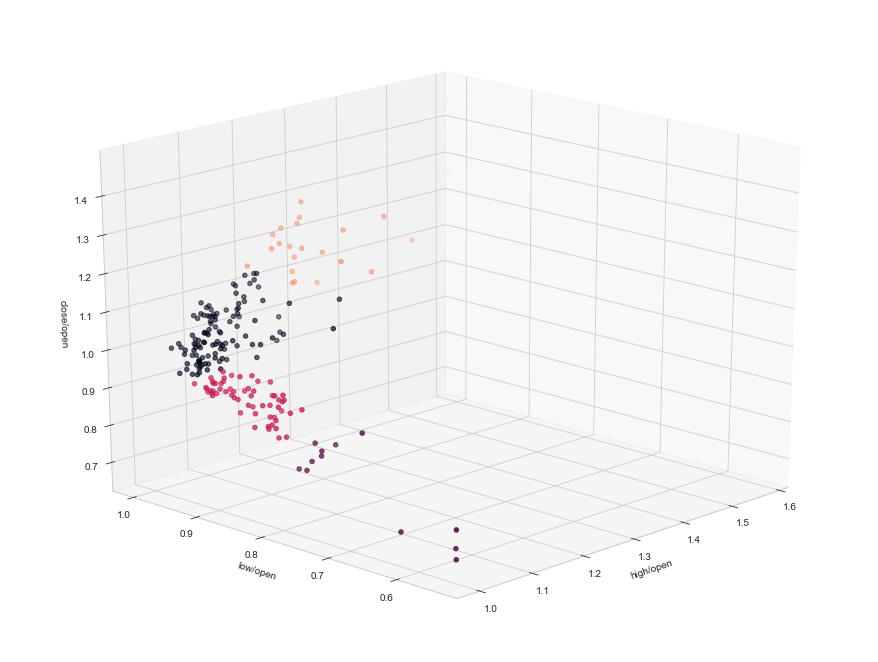

In [365]:
# Plot the 3D normalised candles using H/O, L/O, C/O
plot_3d_normalised_candles(data_norm)


C:\Users\junaj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


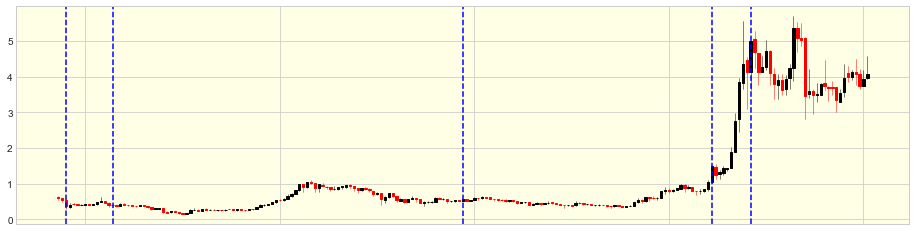

In [366]:
def plot_cluster_ordered_candles(data):
    """
    Plot a candlestick chart ordered by cluster membership
    with the dotted blue line representing each cluster
    boundary.
    """
    # Set the format for the axis to account for dates
    # correctly, particularly Monday as a major tick
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter("")
    fig, ax = plt.subplots(figsize=(16,4))
    #ax.xaxis.set_major_locator(mondays)
    #ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)

    # Sort the data by the cluster values and obtain
    # a separate DataFrame listing the index values at
    # which the cluster boundaries change
    df = copy.deepcopy(data)
    df.sort_values(by="Cluster", inplace=True)
    #df.reset_index()
    df['date_fmt'] = df['date'].apply(
        lambda date: mdates.date2num(date.to_pydatetime())
    )
    df["clust_index"] =df['date_fmt']
    df["clust_change"] = df["Cluster"].diff()
    change_indices = df[df["clust_change"] != 0]

    # Plot the OHLC chart with cluster-ordered "candles"
    csticks = candlestick_ohlc(
        ax, df[
            ["clust_index", 'open', 'high', 'low', 'close']
        ].values, width=0.6,
        colorup='#000000', colordown='#ff0000'
    )
    ax.set_axis_bgcolor((1,1,0.9))
    # Add each of the cluster boundaries as a blue dotted line
    for row in change_indices.iterrows():
        plt.axvline(
            row[1]["clust_index"],
            linestyle="dashed", c="blue"
        )
    
    
   
    plt.show()
plot_cluster_ordered_candles(data)
